## Import Libraries:

In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import cross_validation, metrics
from sklearn.grid_search import GridSearchCV

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4
import numpy as np
import pandas as pd
from scipy.stats import mode
import xgboost as xgb
from xgboost import XGBRegressor,XGBClassifier
from sklearn.metrics import mean_squared_error,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold,StratifiedKFold
from matplotlib import  pyplot
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor

c:\users\llb\appdata\local\programs\python\python36\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
c:\users\llb\appdata\local\programs\python\python36\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


llb


In [2]:
fulldata = pd.read_csv("../merge/fulltable_RandomForstRegressor_fill.csv")   
# fulldata = pd.read_csv("../merge/fulltable_No_fill.csv")                                                                               
print(fulldata.shape)

(40000, 462)


In [3]:
print(fulldata.isnull().sum().sort_values(ascending = False))
fulldata.head()


AMOUNT_num                   0
type_dw_more_4.0_x           0
type_dw_more_10.0            0
type_dw_more_18.0            0
type_dw_more_19.0            0
type_dw_more_23.0            0
type_dw_more_28.0_x          0
type_dw_more_31.0            0
type_dw_more_32.0            0
type_dw_less_1.0_x           0
type_dw_less_2.0_x           0
type_dw_less_4.0             0
type_dw_less_6.0_x           0
type_dw_less_7.0             0
type_dw_less_9.0             0
type_dw_less_18.0            0
type_dw_less_21.0            0
type_dw_less_24.0            0
guarantee_type_more_2.0_x    0
guarantee_type_more_4.0_x    0
guarantee_type_more_7.0      0
guarantee_type_more_10.0     0
guarantee_type_more_15.0     0
guarantee_type_more_16.0     0
guarantee_type_more_17.0     0
guarantee_type_more_19.0     0
guarantee_type_more_22.0     0
type_dw_more_6.0_x           0
finance_org_less_2.0_x       0
guarantee_type_less_2.0_x    0
                            ..
FINANCE_ORG_COUNT_zongshu    0
guarante

,REPORT_ID,AGENT_0,AGENT_1,AGENT_2,AGENT_3,AGENT_4,AGENT_5,AGENT_6,AGENT_7,AGENT_8,...,LAST_MONTHS_max,LAST_MONTHS_min,LAST_MONTHS_mean,LAST_MONTHS_zongshu,LAST_MONTHS_num,AMOUNT_max,AMOUNT_min,AMOUNT_mean,AMOUNTt_zongshu,AMOUNT_num
0,8787,0,1,0,0,0,0,0,0,0,...,0.266667,0.0,0.15,0.019643,0.035802,0.040660,0.065798,0.050971,0.008108,0.037037
1,9410,0,0,0,0,0,0,0,0,0,...,0.000000,0.0,0.00,0.008929,0.000000,0.001661,0.000295,0.001959,0.005405,0.000000
2,22999,0,1,0,0,0,0,0,0,0,...,0.000000,0.0,0.00,0.008929,0.000000,0.001661,0.000295,0.001811,0.000000,0.000000
3,24820,0,1,0,0,0,0,0,0,0,...,0.000000,0.0,0.00,0.008929,0.000000,0.001088,0.000960,0.001403,0.000000,0.000000
4,25708,1,0,0,0,0,0,0,0,0,...,0.000000,0.0,0.00,0.017857,0.012346,0.001269,0.002420,0.002157,0.008108,0.012346


In [5]:

basic_train = pd.read_csv("../input/contest_basic_train.tsv",sep = '\t')
basic_test = pd.read_csv("../input/contest_basic_test.tsv",sep = '\t')

mm = pd.concat([basic_train['REPORT_ID'],basic_train['Y']],axis = 1)
train = mm.merge(fulldata,how = 'left',left_on = 'REPORT_ID',right_on = 'REPORT_ID')
# print(train.isnull().sum().sort_values(ascending = False))

nn = pd.DataFrame(basic_test['REPORT_ID'],columns = ['REPORT_ID'])
test = nn.merge(fulldata,how = 'left',left_on = 'REPORT_ID',right_on = 'REPORT_ID')
print(train.shape,test.shape)
train.head(),test.head()

(30000, 463) (10000, 462)


(   REPORT_ID  Y  AGENT_0  AGENT_1  AGENT_2  AGENT_3  AGENT_4  AGENT_5  \
 0       8787  0        0        1        0        0        0        0   
 1       9410  0        0        0        0        0        0        0   
 2      22999  0        0        1        0        0        0        0   
 3      24820  1        0        1        0        0        0        0   
 4      25708  0        1        0        0        0        0        0   
 
    AGENT_6  AGENT_7     ...      LAST_MONTHS_max  LAST_MONTHS_min  \
 0        0        0     ...             0.266667              0.0   
 1        0        0     ...             0.000000              0.0   
 2        0        0     ...             0.000000              0.0   
 3        0        0     ...             0.000000              0.0   
 4        0        0     ...             0.000000              0.0   
 
    LAST_MONTHS_mean  LAST_MONTHS_zongshu  LAST_MONTHS_num  AMOUNT_max  \
 0              0.15             0.019643         0.035802

In [7]:
trainx = train.iloc[:,2:]
trainy = train.iloc[:,1]
print(trainx.shape,trainy.shape)
trainx.head(),trainy.head()

(30000, 461) (30000,)


(   AGENT_0  AGENT_1  AGENT_2  AGENT_3  AGENT_4  AGENT_5  AGENT_6  AGENT_7  \
 0        0        1        0        0        0        0        0        0   
 1        0        0        0        0        0        0        0        0   
 2        0        1        0        0        0        0        0        0   
 3        0        1        0        0        0        0        0        0   
 4        1        0        0        0        0        0        0        0   
 
    AGENT_8  AGENT_9     ...      LAST_MONTHS_max  LAST_MONTHS_min  \
 0        0        0     ...             0.266667              0.0   
 1        0        0     ...             0.000000              0.0   
 2        0        0     ...             0.000000              0.0   
 3        0        0     ...             0.000000              0.0   
 4        0        0     ...             0.000000              0.0   
 
    LAST_MONTHS_mean  LAST_MONTHS_zongshu  LAST_MONTHS_num  AMOUNT_max  \
 0              0.15             0

In [8]:
trainy.value_counts()

0    28125
1     1875
Name: Y, dtype: int64

## Define a function for modeling and cross-validation
1.通过XGboost 自带的XGboostcv和earning 获得所需要的树的数目
2.其他关键参数通过 网格搜索 寻找
http://blog.csdn.net/q383700092/article/details/53763328

## Step 1- Find the number of estimators for a high learning rate

In [9]:
print("trainx.shape",trainx.shape)
print("trainy.shape",trainy.shape)
from sklearn.cross_validation import train_test_split
x_train,x_valid,y_train,y_valid = train_test_split(trainx,trainy,test_size = 0.2,random_state = 2)  
print("x_train.shape",x_train.shape)
print("x_valid.shape",x_valid.shape)
print("y_train.shape",y_train.shape)
print("y_valid.shape",y_valid.shape)

trainx.shape (30000, 461)
trainy.shape (30000,)
x_train.shape (24000, 461)
x_valid.shape (6000, 461)
y_train.shape (24000,)
y_valid.shape (6000,)


In [ ]:
# x_train = trainx
# y_train = trainy
print(x_train.shape)
skf = StratifiedKFold(n_splits=5)
xgb1 = XGBClassifier(
        booster = 'dart',
        learning_rate =0.1,
        n_estimators=1000,
        max_depth=5,
        min_child_weight=5,
        gamma=0.1,
        subsample=0.8,
        colsample_bytree=0.8,
        objective= 'binary:logistic',
        nthread=4,
        scale_pos_weight=1,
        StratifiedKFold = True,          #0.866124	0.008005	0.965337	0.002286
        seed=1)
xgb_param = xgb1.get_xgb_params()
#构建稀疏矩阵，运行更快
xgtrain = xgb.DMatrix(x_train, label = y_train)
# xgtest =xgb.DMatrix(dtest[predictors].values)   
mm = xgb.cv(xgb_param, xgtrain, num_boost_round=1000, nfold=10,
    metrics='auc', early_stopping_rounds=50)
mm.iloc[-3:,:]
#0.2比例数据用于训练： 0.867883	0.006550	0.957971	0.001910   
    #seed = 1：0.867687	0.003652	0.968111	0.001480
    #seed = 3：0.866441	0.007777	0.950949	0.001576
#全部数据用于训练     0.874547	0.007870	0.959760	0.000931   5
#全部数据用于训练     0.875289	0.008347	0.949510	0.001448   10

(24000, 461)


In [17]:
feature = 0
for i in range(5):
    xgb2 = XGBClassifier(
            learning_rate =0.1,
            n_estimators=mm.shape[0],
            max_depth=5,
            min_child_weight=5,
            gamma=0.1,
            subsample=0.8,
            colsample_bytree=0.8,
            objective= 'binary:logistic',
            nthread=4,
            scale_pos_weight=1,   #15:1
            StratifiedKFold = True,
            seed=27)
    xgb2.fit(trainx,trainy)
    feature += xgb2.feature_importances_
    print(i)
feature = feature/5


0
1
2
3
4


In [20]:
label = trainx.columns

feature = pd.DataFrame(feature,columns = ['importaances'],index = x_train.columns)
feature.sort_values(['importaances'], ascending = False )

,importaances
birth_longitude,0.072883
birth_latitude,0.051447
work_latitude,0.032154
work_longitude,0.023580
end_dateCutopen_date_min,0.021972
open_date_mean_y,0.021436
is_diff1_0,0.019829
open_date_min_y,0.016077
scheduled_payment_amountCutactual_payment_amount_min_y,0.013398
CREDIT_LIMITCutBALANCE_mean,0.013398


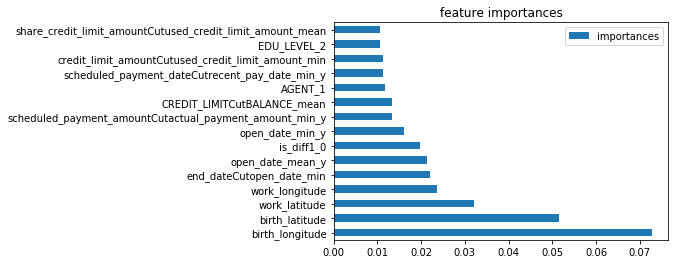

,importances
birth_longitude,0.072883
birth_latitude,0.051447
work_latitude,0.032154
work_longitude,0.023580
end_dateCutopen_date_min,0.021972
open_date_mean_y,0.021436
is_diff1_0,0.019829
open_date_min_y,0.016077
scheduled_payment_amountCutactual_payment_amount_min_y,0.013398
CREDIT_LIMITCutBALANCE_mean,0.013398


In [25]:
xgb2.fit(trainx,trainy)
feature = xgb2.feature_importances_
importance = xgb2.feature_importances_

imp = pd.DataFrame(importance,columns=['importances'],index=x_train.columns)
# print("imp",imp)
# print("........////////")

# imp1 = imp.ix[imp.importances>0.0006,:]
imp1 = imp1.sort_values(['importances' ], ascending = False )
imp1[0:15].plot(kind='barh',title=u'feature importances')
plt.ylabel = 'Area'
plt.xlabel = 'importances'
plt.show()
imp1[0:15]


In [36]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
# from scikitplot import plotters as skplt

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC, LinearSVC

cv = StratifiedKFold(n_splits=5, shuffle=True)

def estimate(estimator, name='estimator'):
    auc = cross_val_score(estimator, x_train, y_train, scoring='roc_auc', cv=cv).mean()
    accuracy = cross_val_score(estimator, x_train, y_train, scoring='accuracy', cv=cv).mean()
    recall = cross_val_score(estimator, x_train, y_train, scoring='recall', cv=cv).mean()

    print("{}: auc:{:f}, recall:{:f}, accuracy:{:f}".format(name, auc, recall, accuracy))
    return auc

In [37]:
estimate(XGBClassifier(
#         booster = 'dart',
        learning_rate =0.1,
        n_estimators=mm.shape[0],    # :0.869196
        max_depth=5,
        min_child_weight=5,
        gamma=0.1,
        subsample=0.8,
        colsample_bytree=0.8,
        reg_alpha=1e-05,
        objective= 'binary:logistic',
        nthread=4,
        scale_pos_weight=1,
        seed=1)
         , 'XGBClassifier')     
# aucc = []
# for i in range(6):
#     if i== 0:
#         aucc.append(estimate(RidgeClassifier(), 'RidgeClassifier'))        #0.7969
#     if i== 1:
#         aucc.append(estimate(LogisticRegression(), 'LogisticRegression'))   #0.797659
#     if i == 2:
#         aucc.append(estimate(RandomForestClassifier(), 'RandomForestClassifier'))  #0.714345
#     if i == 3:
#         aucc.append(estimate(AdaBoostClassifier(), 'AdaBoostClassifier'))  #0.838858
#     if i == 4:
#         aucc.append(estimate(SVC(), 'SVC'))# too long to wait
#     if i == 5:
#         aucc.append(estimate(LinearSVC(), 'LinearSVC'))
# print("最终的AUC",aucc)


#RidgeClassifier: auc:0.802545, recall:0.000000, accuracy:0.936875
# LogisticRegression: auc:0.799948, recall:0.029108, accuracy:0.935792
# RandomForestClassifier: auc:0.699755, recall:0.016521, accuracy:0.936167
# AdaBoostClassifier: auc:0.834362, recall:0.059533, accuracy:0.934541
# SVC: auc:0.698281, recall:0.000000, accuracy:0.937000
# LinearSVC: auc:0.798138, recall:0.001982, accuracy:0.936750         20%预留数据

c:\users\llb\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
c:\users\llb\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
c:\users\llb\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
c:\users\llb\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocess

XGBClassifier: auc:0.866365, recall:0.048950, accuracy:0.937000


c:\users\llb\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.8663654847179492

In [40]:
print(x_train.shape)   #0.690831	0.010714	0.776624	0.002014
print(y_train.shape)

xgb1 = XGBClassifier(
        booster = 'dart',
        learning_rate =0.1,
        n_estimators=mm.shape[0],
        max_depth=5,
        min_child_weight=5,
        gamma=0.1,
        subsample=0.8,
        colsample_bytree=0.8,
        reg_alpha=1e-05,
        objective= 'binary:logistic',
        nthread=4,
        scale_pos_weight=1,
        seed=1)
xgb1.fit(x_train,y_train)
pred1 = xgb1.predict_proba(x_valid)[:,1]
auc = roc_auc_score(y_valid,pred1)
print("xgb1 auc",auc)

xgb2 = XGBClassifier(
        learning_rate =0.1,
        n_estimators=mm.shape[0],    # 0.8719
        max_depth=5,
        min_child_weight=5,
        gamma=0.1,
        subsample=0.8,
        colsample_bytree=0.8,
        reg_alpha=1e-05,
        objective= 'binary:logistic',
        nthread=4,
        scale_pos_weight=1,
        seed=1)
xgb2.fit(x_train,y_train)
pred2 = xgb2.predict_proba(x_valid)[:,1]
# pred1 = xgb2.predict_proba(x_valid)
auc = roc_auc_score(y_valid,pred2)
print("xgb2 auc",auc)
predttal = 0.8*pred1 + 0.7*pred2#+0.01*pred5
auc = roc_auc_score(y_valid,predttal)
print("total auc",auc)

(24000, 461)
(24000,)
xgb1 auc 0.8811458725823234
xgb2 auc 0.879132903372102
total auc 0.8823769163892053


In [50]:
# 看下很多个随机数结果怎么样？  30个随机数
import random
print (random.uniform(0.75,0.85))  
rand = []
for i in range(10):
    rand.append(random.uniform(0.75,0.85))
print("rand",rand)
last = 0
for i in range(9):
    pred1 = 0
    xgb1 = XGBClassifier(
            booster = 'dart',
            learning_rate =0.1,
            n_estimators=mm.shape[0],
            max_depth=5,
            min_child_weight=5,
            gamma=0.1,
            subsample=rand[i],
            colsample_bytree=0.8,
            reg_alpha=1e-05,
            objective= 'binary:logistic',
            nthread=4,
            scale_pos_weight=1,
            seed=1)
    xgb1.fit(x_train,y_train)
    pred1 = xgb1.predict_proba(x_valid)[:,1]
    auc = roc_auc_score(y_valid,pred1)
    last += pred1
    print("i:{},xgb1 auc:{}".format(i,auc))
xgb1 = XGBClassifier(
        booster = 'dart',
        learning_rate =0.1,
        n_estimators=mm.shape[0],
        max_depth=5,
        min_child_weight=5,
        gamma=0.1,
        subsample=0.8,
        colsample_bytree=0.8,
        reg_alpha=1e-05,
        objective= 'binary:logistic',
        nthread=4,
        scale_pos_weight=1,
        seed=1)
xgb1.fit(x_train,y_train)
pred2 = xgb1.predict_proba(x_valid)[:,1]
auc = roc_auc_score(y_valid,pred2)
print("sumple = 0.8",auc)
last += pred2
last = last/10
roc_auc_score(y_valid,last)

0.7521185327005503
rand [0.849888977547213, 0.8046867250116376, 0.7682410930201314, 0.8108991420562921, 0.7878214834792651, 0.8199617191419766, 0.8185516832998609, 0.8206452250366951, 0.7887756549508115, 0.836135243848816]
i:0,xgb1 auc:0.8821081295318076
i:1,xgb1 auc:0.8845237903247483
i:2,xgb1 auc:0.8869663298034288
i:3,xgb1 auc:0.8810119678570015
i:4,xgb1 auc:0.8838410717069578
i:5,xgb1 auc:0.8831979380627113
i:6,xgb1 auc:0.8825132646314127
i:7,xgb1 auc:0.8841641046392121
i:8,xgb1 auc:0.8814801456922506
sumple = 0.8 0.8811458725823234


0.8864654088419147

In [ ]:
# 这个是随机森林填充后降维到271维的最优数据
# xgb auc 0.8656555676564127
# Log auc 0.8075853722906698
# total auc 0.8658856602613786、

#随机森林填充后不降维的最优结果
xgb auc 0.8671208942459312
Log auc 0.7976350155009755
total auc 0.8662997016730364

# 下面通过网格搜索寻找其他参数

In [15]:
#Grid seach on subsample and max_features
#Choose all predictors except target & IDcols
param_test1 = {
    'max_depth':range(3,10,2),
    'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=mm.shape[0], max_depth=5, booster = 'dart',
                                        min_child_weight=1, gamma=0.1, subsample=0.8, colsample_bytree=0.8,
                                        objective= 'binary:logistic', nthread=3, scale_pos_weight=1, seed=27), 
                       param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(x_train,y_train)
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

c:\users\llb\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.86179, std: 0.00461, params: {'max_depth': 3, 'min_child_weight': 1},
  mean: 0.86345, std: 0.00401, params: {'max_depth': 3, 'min_child_weight': 3},
  mean: 0.86213, std: 0.00469, params: {'max_depth': 3, 'min_child_weight': 5},
  mean: 0.86393, std: 0.00536, params: {'max_depth': 5, 'min_child_weight': 1},
  mean: 0.86692, std: 0.00617, params: {'max_depth': 5, 'min_child_weight': 3},
  mean: 0.86670, std: 0.00629, params: {'max_depth': 5, 'min_child_weight': 5},
  mean: 0.86413, std: 0.00459, params: {'max_depth': 7, 'min_child_weight': 1},
  mean: 0.86479, std: 0.00829, params: {'max_depth': 7, 'min_child_weight': 3},
  mean: 0.86579, std: 0.00464, params: {'max_depth': 7, 'min_child_weight': 5},
  mean: 0.86106, std: 0.00301, params: {'max_depth': 9, 'min_child_weight': 1},
  mean: 0.86104, std: 0.00751, params: {'max_depth': 9, 'min_child_weight': 3},
  mean: 0.86562, std: 0.00625, params: {'max_depth': 9, 'min_child_weight': 5}],
 {'max_depth': 5, 'min_child_weight': 3

In [16]:
# #Grid seach on subsample and max_features
# #Choose all predictors except target & IDcols

print(" x_train", x_train.shape)
print("y_train",y_train.shape)
param_test2 = {
    'max_depth':[4,5,6],
    'min_child_weight':[2,3,4,5,6]
}
gsearch2 = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, n_estimators=mm.shape[0], max_depth=5, booster = 'dart',
                                        min_child_weight=2, gamma=0.1, subsample=0.8, colsample_bytree=0.8,
                                        objective= 'binary:logistic', nthread=3, scale_pos_weight=1,seed=27), 
                       param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch2.fit(x_train,y_train)
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

 x_train (24000, 461)
y_train (24000,)


c:\users\llb\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.86519, std: 0.00699, params: {'max_depth': 4, 'min_child_weight': 2},
  mean: 0.86592, std: 0.00590, params: {'max_depth': 4, 'min_child_weight': 3},
  mean: 0.86701, std: 0.00621, params: {'max_depth': 4, 'min_child_weight': 4},
  mean: 0.86548, std: 0.00597, params: {'max_depth': 4, 'min_child_weight': 5},
  mean: 0.86775, std: 0.00461, params: {'max_depth': 4, 'min_child_weight': 6},
  mean: 0.86739, std: 0.00512, params: {'max_depth': 5, 'min_child_weight': 2},
  mean: 0.86692, std: 0.00617, params: {'max_depth': 5, 'min_child_weight': 3},
  mean: 0.86570, std: 0.00544, params: {'max_depth': 5, 'min_child_weight': 4},
  mean: 0.86670, std: 0.00629, params: {'max_depth': 5, 'min_child_weight': 5},
  mean: 0.86714, std: 0.00577, params: {'max_depth': 5, 'min_child_weight': 6},
  mean: 0.86435, std: 0.00574, params: {'max_depth': 6, 'min_child_weight': 2},
  mean: 0.86720, std: 0.00619, params: {'max_depth': 6, 'min_child_weight': 3},
  mean: 0.86725, std: 0.00606, params: {

In [18]:
#Grid seach on subsample and max_features
#Choose all predictors except target & IDcols
print(x_train.shape,y_train.shape)
param_test2b = {
    'min_child_weight':[3,4,5,6,7,8]
}
gsearch2b = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, n_estimators=mm.shape[0], max_depth=5, booster = 'dart',
                                        min_child_weight=4, gamma=0.1, subsample=0.8, colsample_bytree=0.8,
                                        objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
                       param_grid = param_test2b, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch2b.fit(x_train,y_train)
gsearch2b.grid_scores_, gsearch2b.best_params_, gsearch2b.best_score_

(24000, 461) (24000,)


c:\users\llb\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.86692, std: 0.00617, params: {'min_child_weight': 3},
  mean: 0.86570, std: 0.00544, params: {'min_child_weight': 4},
  mean: 0.86670, std: 0.00629, params: {'min_child_weight': 5},
  mean: 0.86714, std: 0.00577, params: {'min_child_weight': 6},
  mean: 0.86731, std: 0.00449, params: {'min_child_weight': 7},
  mean: 0.86696, std: 0.00471, params: {'min_child_weight': 8}],
 {'min_child_weight': 7},
 0.867311127348378)

In [19]:
# #Grid seach on subsample and max_features
# #Choose all predictors except target & IDcols
param_test3 = {
    'gamma':[i/10.0 for i in range(0,5)]
}
gsearch3 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=mm.shape[0], max_depth=5, booster = 'dart',
                                        min_child_weight=7, gamma=0.1, subsample=0.8, colsample_bytree=0.8,
                                        objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
                       param_grid = param_test3, scoring='roc_auc',n_jobs=3,iid=False, cv=3)
gsearch3.fit(x_train,y_train)
gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

c:\users\llb\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.86373, std: 0.00415, params: {'gamma': 0.0},
  mean: 0.86438, std: 0.00303, params: {'gamma': 0.1},
  mean: 0.86417, std: 0.00334, params: {'gamma': 0.2},
  mean: 0.86350, std: 0.00311, params: {'gamma': 0.3},
  mean: 0.86381, std: 0.00338, params: {'gamma': 0.4}],
 {'gamma': 0.1},
 0.8643824325354474)

In [20]:
param_test4 = {
    'learning_rate':[0.02,0.025,0.05,0.08,0.1]
}
gsearch4 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=mm.shape[0], max_depth=5, booster = 'dart',
                                        min_child_weight=7, gamma=0.1, subsample=0.8, colsample_bytree=0.8,
                                        objective= 'binary:logistic', nthread=3, scale_pos_weight=1,seed=27), 
                       param_grid = param_test4, scoring='roc_auc',n_jobs=3,iid=False, cv=5)
gsearch4.fit(x_train,y_train)
gsearch4.grid_scores_, gsearch4.best_params_, gsearch4.best_score_

c:\users\llb\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.85335, std: 0.00686, params: {'learning_rate': 0.02},
  mean: 0.85474, std: 0.00656, params: {'learning_rate': 0.025},
  mean: 0.86255, std: 0.00498, params: {'learning_rate': 0.05},
  mean: 0.86670, std: 0.00542, params: {'learning_rate': 0.08},
  mean: 0.86731, std: 0.00449, params: {'learning_rate': 0.1}],
 {'learning_rate': 0.1},
 0.867311127348378)

Tune subsample and colsample_bytree

In [ ]:
# #Grid seach on subsample and max_features
# #Choose all predictors except target & IDcols
param_test4 = {
    'subsample':[i/10.0 for i in range(6,10)],
    'colsample_bytree':[i/10.0 for i in range(6,10)]
}
gsearch4 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=mm.shape[0], max_depth=5, booster = 'dart',
                                        min_child_weight=7, gamma=0.1, subsample=0.8, colsample_bytree=0.8,
                                        objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
                       param_grid = param_test4, scoring='roc_auc',n_jobs=3,iid=False, cv=5)
gsearch4.fit(x_train,y_train)
gsearch4.grid_scores_, gsearch4.best_params_, gsearch4.best_score_

tune subsample:

In [350]:
#Grid seach on subsample and max_features
#Choose all predictors except target & IDcols
param_test5 = {
    'subsample':[i/100.0 for i in range(75,90,5)],
    'colsample_bytree':[i/100.0 for i in range(75,90,5)]
}
gsearch5 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=mm.shape[0], max_depth=5, booster = 'dart',
                                        min_child_weight=4, gamma=0, subsample=0.8, colsample_bytree=0.8,
                                        objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
                       param_grid = param_test5, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch5.fit(x_train,y_train)
gsearch5.grid_scores_, gsearch5.best_params_, gsearch5.best_score_

Got the same value as assument and no change requried.

Try regularization:  (防止过拟合的)

In [19]:
# #Grid seach on subsample and max_features
# #Choose all predictors except target & IDcols
param_test6 = {
    'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}
gsearch6 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=mm.shape[0], max_depth=5, booster = 'dart',
                                        min_child_weight=4, gamma=0, subsample=0.9, colsample_bytree=0.6,
                                        objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
                       param_grid = param_test6, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch6.fit(x_train,y_train)
gsearch6.grid_scores_, gsearch6.best_params_, gsearch6.best_score_

c:\users\llb\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.87082, std: 0.00975, params: {'reg_alpha': 1e-05},
  mean: 0.86979, std: 0.01012, params: {'reg_alpha': 0.01},
  mean: 0.86999, std: 0.00996, params: {'reg_alpha': 0.1},
  mean: 0.86937, std: 0.01129, params: {'reg_alpha': 1},
  mean: 0.83875, std: 0.01729, params: {'reg_alpha': 100}],
 {'reg_alpha': 1e-05},
 0.8708201266495739)

In [ ]:
# #Grid seach on subsample and max_features
# #Choose all predictors except target & IDcols
param_test7 = {
    'reg_alpha':[0, 0.00001, 0.00005, 0.01, 0.05]
}
gsearch7 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=mm.shape[0], max_depth=5, booster = 'dart',
                                        min_child_weight=4, gamma=0, subsample=0.9, colsample_bytree=0.6,
                                        objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
                       param_grid = param_test7, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch7.fit(x_train,y_train)
gsearch7.grid_scores_, gsearch7.best_params_, gsearch7.best_score_

In [23]:
xgb3 = XGBClassifier(
        booster = 'dart',
        learning_rate =0.1,
        n_estimators=80,    # 0.8719
        max_depth=5,
        min_child_weight=4,
        gamma=0,
        subsample=0.9,
        colsample_bytree=0.6,
        reg_alpha=1e-05,
        objective= 'binary:logistic',
        nthread=4,
        scale_pos_weight=1,
        seed=27)
param_test7 = {
    'n_estimators':range(mm.shape[0]-20,mm.shape[0]+20,1)
}
gsearch7 = GridSearchCV(estimator = xgb3,
                       param_grid = param_test7, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch7.fit(x_train,y_train)
gsearch7.grid_scores_, gsearch7.best_params_, gsearch7.best_score_

c:\users\llb\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.86801, std: 0.00971, params: {'n_estimators': 52},
  mean: 0.86806, std: 0.00982, params: {'n_estimators': 53},
  mean: 0.86812, std: 0.01001, params: {'n_estimators': 54},
  mean: 0.86818, std: 0.01012, params: {'n_estimators': 55},
  mean: 0.86785, std: 0.01014, params: {'n_estimators': 56},
  mean: 0.86779, std: 0.01024, params: {'n_estimators': 57},
  mean: 0.86861, std: 0.01012, params: {'n_estimators': 58},
  mean: 0.86930, std: 0.00988, params: {'n_estimators': 59},
  mean: 0.86941, std: 0.00960, params: {'n_estimators': 60},
  mean: 0.86963, std: 0.00952, params: {'n_estimators': 61},
  mean: 0.86946, std: 0.00959, params: {'n_estimators': 62},
  mean: 0.86966, std: 0.00948, params: {'n_estimators': 63},
  mean: 0.86946, std: 0.00939, params: {'n_estimators': 64},
  mean: 0.86939, std: 0.00937, params: {'n_estimators': 65},
  mean: 0.86961, std: 0.00941, params: {'n_estimators': 66},
  mean: 0.86994, std: 0.00946, params: {'n_estimators': 67},
  mean: 0.87038, std: 0.